# Remove Noise with Nonlinear Filters

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import wiener

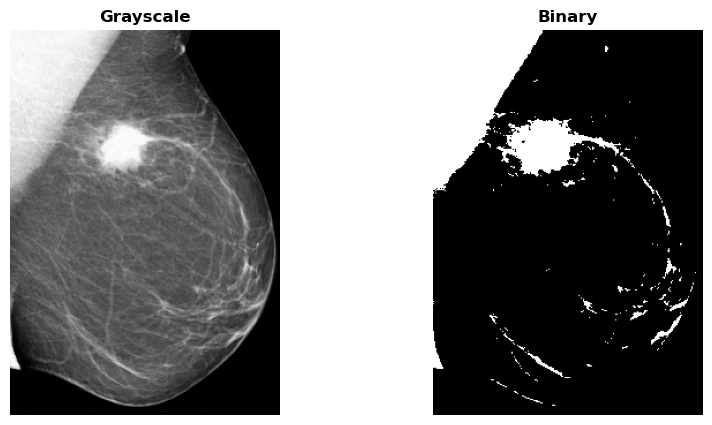

In [2]:
tumor = np.loadtxt("./images/tumorReducedSize.csv", delimiter=",", dtype=np.uint8)
_, tumor_binary = cv2.threshold(tumor, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor, cmap='gray')
axs[0].set_title("Grayscale")
axs[0].axis("off")
axs[1].imshow(tumor_binary, cmap='gray') 
axs[1].set_title("Binary")
axs[1].axis("off")
plt.show()

Replacing each pixel with the median of the ones around it.

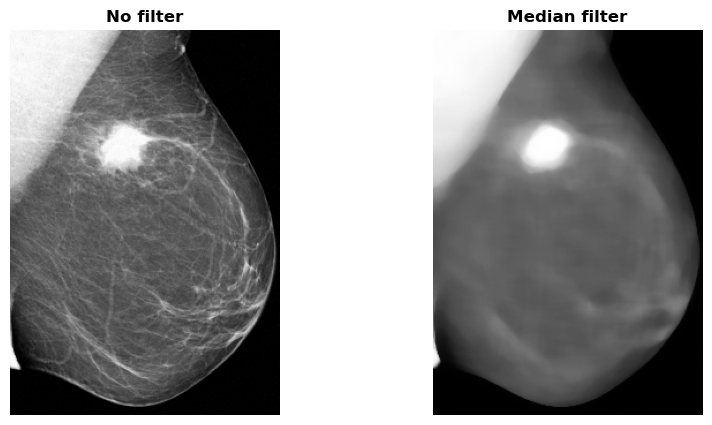

In [3]:
tumor_med = cv2.medianBlur(tumor, ksize=15)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor, cmap='gray')
axs[0].set_title("No filter")
axs[0].axis("off")
axs[1].imshow(tumor_med, cmap='gray') 
axs[1].set_title("Median filter")
axs[1].axis("off")
plt.show()

The median filtered image has lost a lot of detail inside the tissue, but the edges are still crisp.
One way to segment a grayscale image is to binarize it.

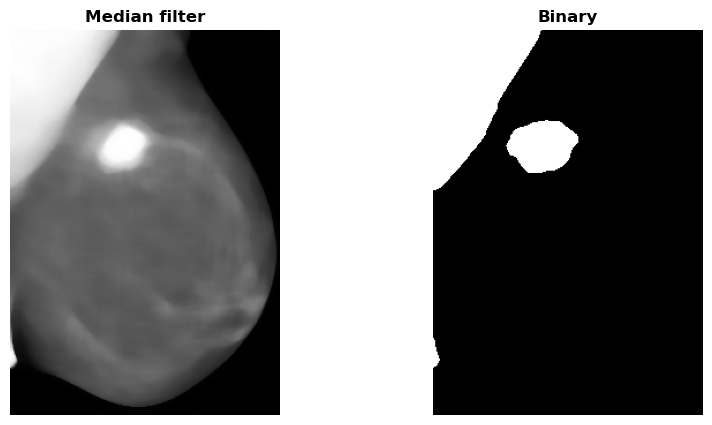

In [4]:
_, tumor_med_binary = cv2.threshold(tumor_med, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor_med, cmap='gray')
axs[0].set_title("Median filter")
axs[0].axis("off")
axs[1].imshow(tumor_med_binary, cmap='gray') 
axs[1].set_title("Binary")
axs[1].axis("off")
plt.show()

Another edge-preserving, nonlinear filter is the Wiener filter, which is adaptive.

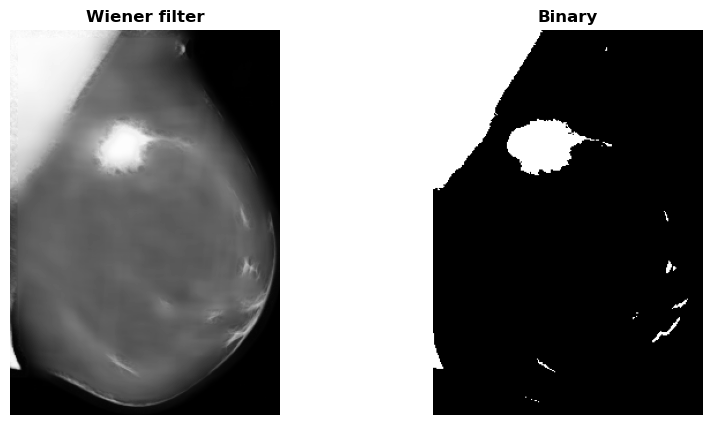

In [6]:
tumor_wiener = wiener(tumor / tumor.max(), (15, 15))
tumor_wiener = np.uint8(tumor_wiener * 255)
_, tumor_wiener_binary = cv2.threshold(tumor_wiener, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor_wiener, cmap='gray')
axs[0].set_title("Wiener filter")
axs[0].axis("off")
axs[1].imshow(tumor_wiener_binary, cmap='gray') 
axs[1].set_title("Binary")
axs[1].axis("off")
plt.show()